# Week 3, Lab \#2

*January 28, 2026*

**Objectives:**

- Gain more sophistication with Python as a programming language
- Practice writing conditional expressions in Python
- Filter and aggregate spatially explicit data

For this lab, we'll be working with data on **Net Primary Productivity (NPP).** Plants (primary producers) take up carbon dioxide from the atmosphere and use it create carbon compounds they store for energy; this is called *photosynthesis.* But plants also have to spend that energy to sustain their metabolism; this requires them to burn carbon compounds, so some of that stored carbon is returned to the atmosphere. **NPP is the amount of carbon (C) stored in plant tissues after accounting for the C they lose in respiration.**

    NPP = [C fixed in photosynthesis] - [C lost in plant respiration]
    
NPP is often measured in grams of carbon (C) per square meter per unit time. It's most convenient to estimate NPP on annual time scales, so the data here are in grams of carbon (C) per square meter (m$^{-2}$) per year (g C m$^{-2}$ year$^{-1}$).

**We'll be working with a global dataset on GPP and NPP:**

- [Multiple-biome NPP estimates from the Global Primary Production Data Initiative (GPPDI)](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=617)

Some of the abbreviations used in this dataset include:

**Biome types:**

- C3 and C4 refer to two different kinds of photosynthesis; most plants are C3 but C4 plants include important agricultural varieties like corn.
- ENL refers to Evergreen Needleleaf ("coniferous" trees)
- DNL refers to Deciduous Needleleaf (like a Western Larch, it loses its needles in the fall)
- EBL refers to Evergreen Broadleaf, like broad-leaved tropical trees
- DBL refers to Deciduous Broadleaf, like an Oak or Maple, which lose leaves in the fall

# Introduction

How do rates of NPP (i.e., the amount of C fixed in plant tissues per unit area per unit time) vary between different biomes?

Let's take a look at the data.

In [1]:
import pandas as pd

#pd.read_csv("http://files.ntsg.umt.edu/data/GIS_Programming/data/GPPDI_ClassA_NPP_162_R2.csv")
pd.read_csv("GPPDI_ClassA_Flags_162.csv")

,SITE_ID,LAT_DD,LONG_DD,ELEV_GIV,SOURCE,BIOMENEW,BIOME2,TEMP_ANN,PREC_ANN,ANPP_C,...,PRECBADF,TAVEBADF,MODCA_AV,AETCA_AV,MOD_NE,MOD_BIAS,MOD_MAE,FLAGS,FLAGS_N,MEAS_ID
0,4,-27.75,152.45,-999,Day,grassland / C4 tropical,grassland,18.5,917,165,...,0,0,790,877,0.998,526,1.994,0,13,1
1,5,-27.03,152.02,-999,Day,grassland / C4 tropical,grassland,17.5,848,106,...,0,0,808,803,1.288,633,3.615,0,13,2
2,6,-26.76,148.82,-999,Day,grassland / C4 tropical,grassland,20.4,541,68,...,0,0,436,549,1.194,326,2.966,2,13,4
3,6,-26.76,148.82,-999,Day,grassland / C4 tropical,grassland,20.4,541,106,...,0,0,436,549,0.907,272,1.660,0,13,3
4,7,-26.58,148.77,-999,Day,grassland / C4 tropical,grassland,20.5,553,105,...,0,0,430,565,0.910,269,1.669,0,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,145,64.75,-148.25,-999,STG,ENL forest / boreal,ENL forest / boreal,-3.5,269,310,...,0,0,340,174,-0.237,-91,-0.212,0,13,171
158,145,64.75,-148.25,-999,STG,ENL forest / boreal,ENL forest / boreal,-3.5,269,415,...,0,0,340,174,-0.572,-272,-0.445,1,13,169
159,145,64.75,-148.25,-999,STG,ENL forest / boreal,ENL forest / boreal,-3.5,269,540,...,0,0,340,174,-0.653,-329,-0.492,2,13,168
160,145,64.75,-148.25,-999,STG,ENL forest / boreal,ENL forest / boreal,-3.5,269,635,...,0,0,340,174,-0.802,-455,-0.573,3,13,167


**There are three different columns that describe NPP:**

- `ANPP_C` refers to Above-ground NPP; this is the portion of NPP (carbon) that is stored in the parts of plants above ground, like leaves, stems, and tree trunks.
- `BNPP_C` refers to Below-ground NPP; this is the portion of NPP (carbon) that is stored in below-ground plant parts, specifically the roots.
- `TNPP_C` is the sum of `ANPP_C` and `BNPP_C`.

In [2]:
# Load the data with just a subset of the columns
data = pd.read_csv("GPPDI_ClassA_Flags_162.csv",
                  usecols = ["SITE_ID", "LAT_DD", "LONG_DD", "BIOMENEW", "TNPP_C"])

In [3]:
type(data)

pandas.core.frame.DataFrame

You haven't seen this type of object in Python before, but a pandas "DataFrame" is a data structure for holding tabular (row-column) data.

In [4]:
data.columns

Index(['SITE_ID', 'LAT_DD', 'LONG_DD', 'BIOMENEW', 'TNPP_C'], dtype='object')

We can iterate through the table row-by-row if we convert the DataFrame to a NumPy array:

In [5]:
for row in data.to_numpy():
    print(row)

[4 -27.75 152.45 'grassland / C4 tropical' 264]
[5 -27.03 152.02 'grassland / C4 tropical' 175]
[6 -26.76 148.82 'grassland / C4 tropical' 110]
[6 -26.76 148.82 'grassland / C4 tropical' 164]
[7 -26.58 148.77 'grassland / C4 tropical' 161]
[8 -26.48 148.68 'grassland / C4 tropical' 151]
[8 -26.48 148.68 'grassland / C4 tropical' 161]
[9 -26.4 146.27 'grassland / C3' 72]
[9 -26.4 146.27 'grassland / C3' 111]
[10 -25.67 151.75 'grassland / C4 tropical' 158]
[10 -25.67 151.75 'grassland / C4 tropical' 196]
[10 -25.67 151.75 'grassland / C4 tropical' 214]
[10 -25.67 151.75 'grassland / C4 tropical' 299]
[10 -25.67 151.75 'grassland / C4 tropical' 305]
[10 -25.67 151.75 'grassland / C4 tropical' 362]
[11 -25.08 146.5 'grassland / C4 tropical' 331]
[14 -24.19 150.69 'grassland / C4 tropical' 230]
[15 -24.16 150.95 'grassland / C4 tropical' 170]
[15 -24.16 150.95 'grassland / C4 tropical' 206]
[15 -24.16 150.95 'grassland / C4 tropical' 711]
[16 -23.3 150.51 'grassland / C4 tropical' 240]
[17

---

## Problem 2.1: Sorting Latitude and Longitude

What are the most extreme latitude and longitude values in this dataset for each hemisphere? For instance, in the Northern Hemisphere (latitudes between 0 and 90 deg N), what is the lowest (minimum) and highest (maximum) latitude? You want to find:

- North-most latitude in the Northern hemisphere
- South-most latitude in the Southern hemisphere
- West-most longitude in the Western hemisphere
- East-most longitude in the Eastern hemisphere

**You should use a `for` loop to do this.**

**Hint:**

There are `max()` and `min()` functions built into Python...

In [6]:
max([1, 3, 5, 9])

9

In [7]:
min([1, -1, 2, 12, 0])

-1

#### Problem 2.1 Solution

In [8]:
# save the second element of each row (latitude
lat_list = []
for row in data.to_numpy():
    lat_list.append(row[1])
# save the third element of each row (longitude)
lon_list = []
for row in data.to_numpy():
    lon_list.append(row[2])

In [9]:
# print out the max (Northern & Eastern hemispheres) or min (Southern & Western hemispheres) value of eavch lat/lon list
print("North-most latitude in the Northern hemisphere: " + str(max(lat_list)))
print("South-most latitude in the Southern hemisphere: " + str(min(lat_list)))
print("West-most longitude in the Western hemisphere: " + str(min(lon_list)))
print("East-most longitude in the Eastern hemisphere: " + str(max(lon_list)))

North-most latitude in the Northern hemisphere: 66.37
South-most latitude in the Southern hemisphere: -27.75
West-most longitude in the Western hemisphere: -148.25
East-most longitude in the Eastern hemisphere: 152.45


---

## Problem 2.2: What are the Unique Biomes?

Write a Python code block that prints the unique biome names in this dataset. If you know a better way, feel free to show multiple ways of doing the same thing. You'll also need to store the unique names as a Python `list` so you can use it later.

**You should use a `for` loop to do this.**

As an example, here's how we might iterate through the "BIOMENEW" values in each row...

In [10]:
# Print just the biome type
for row in data.to_numpy():
    # We can "unpack" each element in a row
    site_id, latitude, longitude, biome, npp = row
    print(biome)

grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C3
grassland / C3
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
grassland / C4 tropical
DBL forest / tropical
EBL forest / tropical
DBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
grassland / C4 tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
EBL forest / tropical
grassland / C4 tropical
grassland / C4 tropical
EBL forest / tropical
EBL forest / tro

#### Problem 2.2 Solutions

In [11]:
# APPROACH 1
# append each element in biome column to new blank list
biome_list = []
for x in data["BIOMENEW"]:
    biome_list.append(x)

# use membership test to save new list of unique values (is this value in the original list? If not then add to list of unique biomes, if it is already there then skip.)
unique_biomes = []
for biome in biome_list:
    if biome in unique_biomes:
        pass
    else:
        unique_biomes.append(biome)

# print unique biome names
print("Unique biomes in dataset: " + str(unique_biomes))

Unique biomes in dataset: ['grassland / C4 tropical', 'grassland / C3', 'DBL forest / tropical', 'EBL forest / tropical', 'grassland / C4 temperate', 'DBL forest / temperate', 'ENL forest / temperate', 'ENL forest / boreal', 'DNL forest / boreal', 'DBL forest / boreal']


In [12]:
# APPROACH 2
# append each element in biome column to new blank list
biome_list = []
for x in data["BIOMENEW"]:
    biome_list.append(x)

# save new list of unique values from previous list using set of values in both
unique_biomes = list(set(biome_list))
# print unique biome names
print("Unique biomes in dataset: " + str(unique_biomes))

Unique biomes in dataset: ['grassland / C4 tropical', 'ENL forest / temperate', 'DBL forest / temperate', 'EBL forest / tropical', 'DBL forest / tropical', 'DBL forest / boreal', 'ENL forest / boreal', 'grassland / C4 temperate', 'grassland / C3', 'DNL forest / boreal']


---

## Problem 2.3: Summarize NPP by Biome

Now that you have a list of unique biomes, calculate the mean NPP for each biome. Display the results in some meaningful way. I included a script for plotting the data if you want to use that.

#### Problem 2.3 Solution

In [13]:
# create dictionaries to store values for each biome
biome_sum = {}
biome_count = {}
biome_mean = {}
for biome in unique_biomes:
    biome_sum[biome] = 0
    biome_count[biome] = 0

# loop through list with unique biome names and find correspoondinog TNPP_C when selected biome appears in dataframe
for i in range(len(biome_list)):
    # save biome name for current row
    biome = biome_list[i]
    # save TNPP_C value for same current row
    value = data["TNPP_C"][i]
    # add current TNPP_C value to biome total
    biome_sum[biome] += value
    # increase count for selected biome +1
    biome_count[biome] += 1

# loop through each biome in dictionary to calculate mean from sum/count values
for biome in biome_sum:
    biome_mean[biome] = biome_sum[biome] / biome_count[biome]

# print the final dictionary of mean TNPP_C values by biome
for biome in biome_mean:
    print(biome + " mean NPP: " + str(round(biome_mean[biome], 2)) + " g/m²")

grassland / C4 tropical mean NPP: 286.4 g/m²
ENL forest / temperate mean NPP: 468.67 g/m²
DBL forest / temperate mean NPP: 939.67 g/m²
EBL forest / tropical mean NPP: 526.0 g/m²
DBL forest / tropical mean NPP: 388.0 g/m²
DBL forest / boreal mean NPP: 320.0 g/m²
ENL forest / boreal mean NPP: 444.36 g/m²
grassland / C4 temperate mean NPP: 237.33 g/m²
grassland / C3 mean NPP: 211.3 g/m²
DNL forest / boreal mean NPP: 380.67 g/m²


<BarContainer object of 10 artists>

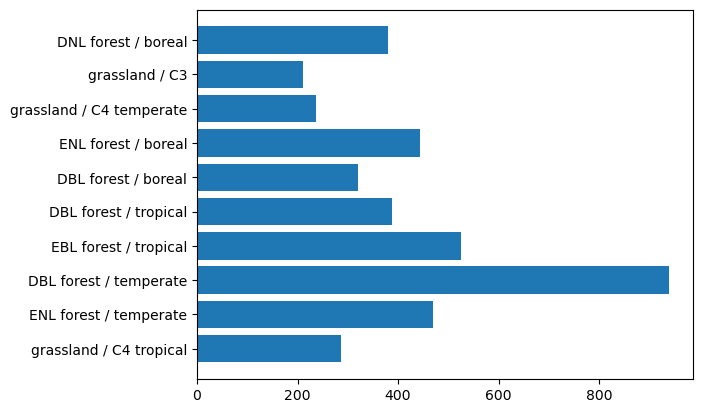

In [14]:
# create horizontal bar plot using list unique_biomes for unique biome labels
import numpy as np
from matplotlib import pyplot
# reordered list of mean
mean_values = []
for biome in unique_biomes:
    mean_values.append(biome_mean[biome])
# produce bar plot
pyplot.barh(unique_biomes, mean_values)

---

## Problem 2.4: Calculating Distances on a Sphere

Let's revisit the previous challenge in a different way. Can we calculate the distance between latitude and longitude pairs to determine if they are "close enough" to be considered the same point?

The Haversine function can be used to calculate *great circle distance* (shortest path on a sphere) between two points, but this is a complicated function so we'll just pretend the Earth is flat. For flat distances between two points that are close together, `(x1, y1)` and `(x2, y2)` (`x` and `y` refer to longitude and latitude, respectively), the Euclidean distance function is a good approximation:

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

**Write the Euclidean distance function as a Python function (your own function, using the `def` keyword) and use it to calculate the distance between the first two rows of the `data` table.**

In [15]:
data[0:2]

,SITE_ID,LAT_DD,LONG_DD,BIOMENEW,TNPP_C
0,4,-27.75,152.45,grassland / C4 tropical,264
1,5,-27.03,152.02,grassland / C4 tropical,175


**Hint:** You can calculate square roots one of two ways.

You could raise a number to the power `(1/2)`:

In [16]:
4 ** 0.5

2.0

Or, you could:

In [17]:
from math import sqrt
sqrt(4)

2.0

#### Problem 2.4 Solution

In [18]:
def euclid_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    distance = (dx**2 + dy**2)**0.5
    return distance

# extract first two rows of data table
x1 = data["LONG_DD"][0]
y1 = data["LAT_DD"][0]
x2 = data["LONG_DD"][1]
y2 = data["LAT_DD"][1]

# calculate distance between selected two rows
distance = euclid_distance(x1, y1, x2, y2)
print("Euclidean distance between first two rows:" + str(distance))

Euclidean distance between first two rows:0.8386298349092881


---